In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
#from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [2]:
import imblearn

In [3]:
df = pd.read_csv("C:/Users/admin/Downloads/creditcardfraud/creditcard.csv")
df.drop('Time', axis = 1, inplace = True)

print(df.head())

#Time data has no relation to the output of data

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#checking for null values.. #there are no null values...
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:ylabel='Class'>

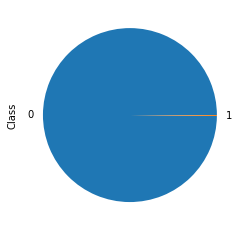

In [6]:
df['Class'].value_counts().plot.pie(radius=1)

<AxesSubplot:>

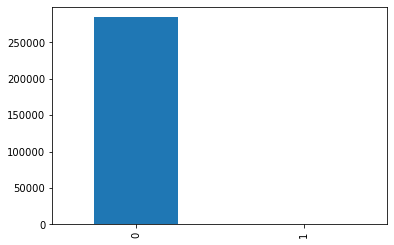

In [7]:
df['Class'].value_counts().plot.bar()

In [8]:
#scaling of amount data

sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [9]:
#splitting into features and labels

X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [23]:
#splitting data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
#print Training size and test size

print('number of training samples are:',len(X_train))
print('number of testing samples are:',len(X_test))

number of training samples are: 199364
number of testing samples are: 85443


In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

print('accuracy score with logistic regression:',accuracy_score(y_test,lr_yhat))

#logistic regression

accuracy score with logistic regression: 0.999204147794436


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_yhat))
print(confusion_matrix(y_test,lr_yhat))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

[[85284    12]
 [   56    91]]


In [27]:
from imblearn.under_sampling import RandomUnderSampler #import the required library

In [28]:
nm=RandomUnderSampler() #RandomUnderSampler object


In [16]:
import imblearn

In [29]:
x_train_nm,y_train_nm=nm.fit_resample(X_train,y_train)#apply to RandomUnderSampler

In [32]:
lr.fit(x_train_nm,y_train_nm) #train the model
y_pred_nm=lr.predict(X_test) #predict from the model

print(confusion_matrix(y_test,y_pred_nm))


[[81797  3499]
 [   10   137]]


In [35]:
from imblearn.over_sampling import RandomOverSampler #import the required library


In [43]:
os=RandomOverSampler() #RandomOverSampler object


In [45]:
x_train_os,y_train_os=os.fit_resample(X_train,y_train)#apply to RandomOverSampler


In [49]:
lr.fit(x_train_os,y_train_os) #train the model
y_pred_os=lr.predict(X_test) #predict from the model
#confusion matrix
print(confusion_matrix(y_test,y_pred_os))

[[83331  1965]
 [   13   134]]


In [51]:
#SMOTE
from imblearn.over_sampling import SMOTE #import the required library
sm=SMOTE() #SMOTE object


In [52]:
x_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)#apply to SMOTE


In [54]:
lr.fit(x_train_sm,y_train_sm) #train the model
y_pred_sm=lr.predict(X_test) #

In [55]:
print(confusion_matrix(y_test,y_pred_sm))


[[83199  2097]
 [   12   135]]


In [56]:
print(classification_report(y_test,y_pred_sm))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [57]:
from imblearn.ensemble import BalancedRandomForestClassifier #import the required library
brf = BalancedRandomForestClassifier() #BalancedRandomForestClassifier object
tem=brf.fit(X_train, y_train) #fit 
y_pred_BRFC = brf.predict(X_test)
#confusion matrix
print(confusion_matrix(y_test,y_pred_BRFC)) 

[[83426  1870]
 [   16   131]]


In [58]:
print(classification_report(y_test,y_pred_BRFC))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.89      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
#Anomaly detection


In [ ]:
#threshold moving

In [ ]:
#completed: undersampling,os,bagging classifier